In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# **Extract Data**

In [2]:
# 1. Load the IMDB dataset (binary sentiment classification)
vocab_size = 10000  # Only use top 10k words
max_length = 200    # Max length per review

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Build Model**

In [3]:
# 2. Build the Model
model = tf.keras.Sequential([
    layers.Embedding(vocab_size, 32, input_length=max_length),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# **Compile Model**

In [4]:
# 3. Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# **Train**

In [5]:
# 4. Train the Model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5624 - loss: 0.6905 - val_accuracy: 0.7180 - val_loss: 0.6736
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7083 - loss: 0.6648 - val_accuracy: 0.7406 - val_loss: 0.6251
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7681 - loss: 0.6066 - val_accuracy: 0.7924 - val_loss: 0.5458
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8079 - loss: 0.5223 - val_accuracy: 0.8192 - val_loss: 0.4687
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8364 - loss: 0.4414 - val_accuracy: 0.8274 - val_loss: 0.4152
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8555 - loss: 0.3844 - val_accuracy: 0.8548 - val_loss: 0.3717
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8768 - loss: 0.3381 - val_accuracy: 0.8592 - val_loss: 0.3472
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8833 - loss: 0.3068 - val_accuracy: 0.8528 - v

# **Evaluate Model**

In [6]:
# 5. Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8637 - loss: 0.3193

Test Accuracy: 0.86


# **Visualise Outputs**

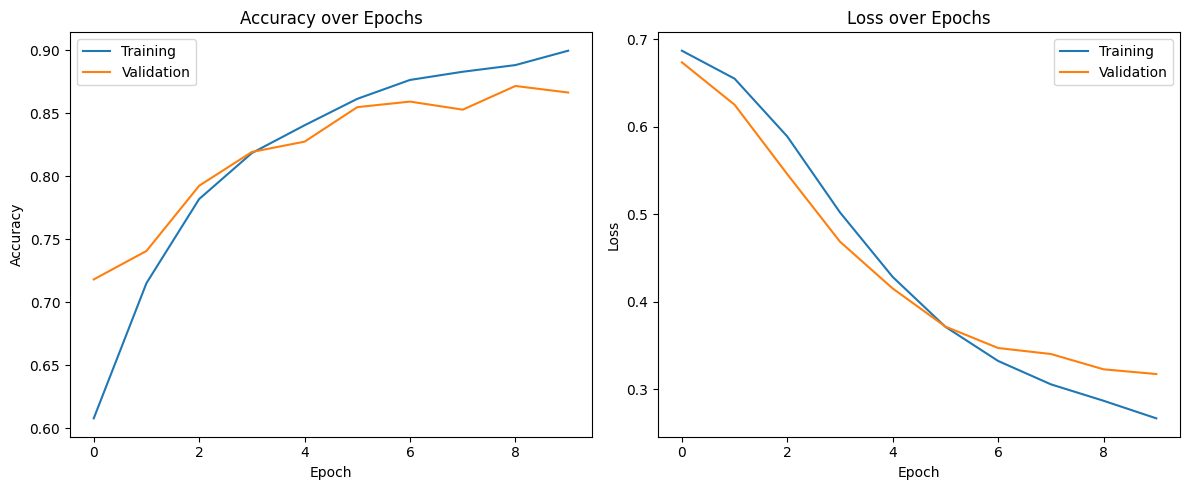

In [7]:
# 6. Visualize Accuracy & Loss
def plot_graphs(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_graphs(history)


# **Prediction**

In [8]:
# 7. Predict and Show Sentiment
sample_review = "The movie was fantastic! I loved it."
# Convert text to sequence using tokenizer (for real use-case)
# For now, just show how prediction is made on padded input:
import numpy as np

def predict_review(text):
    # Tokenizer not available directly from IMDB loader, example
    print("Prediction is for demonstration only (no real tokenizer used).")
    print("Input text:", text)
    review = np.zeros((1, max_length))  # Simulated input
    pred = model.predict(review)[0][0]
    sentiment = "Positive" if pred >= 0.5 else "Negative"
    print(f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})")

predict_review(sample_review)


Prediction is for demonstration only (no real tokenizer used).
Input text: The movie was fantastic! I loved it.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Sentiment: Positive (Confidence: 0.75)
